In [77]:
#Loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
prev_app= pd.read_csv('previous_application.csv')
app_data= pd.read_csv('application_data.csv')

**Cleaning application_data.csv**

In [79]:
#Dropping unimportant columns with large null values
na_data = app_data.isna().sum()
for index, col in enumerate(na_data):
    if (col/app_data.shape[0] > 0.4 and na_data.index[index] not in ['OWN_CAR_AGE', 'EXT_SOURCE_1']):     
        app_data.drop([na_data.index[index]], inplace= True, axis='columns')
# Removing outliers , junk values
app_data = app_data[app_data['AMT_INCOME_TOTAL'] < 0.5e7]

In [80]:
#Dropping unimportant columns which are not related to customer attributes
app_data.drop(["AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_HOUR"], inplace=True, axis="columns")

In [81]:
# Handling unknown values
app_data['OCCUPATION_TYPE'].fillna('NONE', inplace=True)
for col_name in ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN']:
    app_data[col_name].fillna(0, inplace=True)
app_data.shape

(307506, 69)

**Cleaning previous_application.csv**

In [82]:
# Keep only approved loans' data
prev_data = prev_app[prev_app["NAME_CONTRACT_STATUS"] == "Approved"]
prev_data = prev_data[prev_data['AMT_ANNUITY'].notna() & prev_data['AMT_CREDIT'].notna() & prev_data['NFLAG_LAST_APPL_IN_DAY'] == 1 ]

In [83]:
# Remove unimportant columns and fill na values
prev_data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
prev_data = prev_data[prev_data['AMT_CREDIT'] <1e6]
prev_data.drop(['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'], inplace=True, axis='columns')
prev_data.drop(['NFLAG_INSURED_ON_APPROVAL', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS', 'NFLAG_LAST_APPL_IN_DAY', 'CODE_REJECT_REASON'], inplace=True, axis='columns')

In [84]:
# Append TARGET and AMT_INCOME_TOTAL in previous applicate data
app_data_target = app_data.loc[:,["SK_ID_CURR","TARGET", "AMT_INCOME_TOTAL"]]
prev_data=prev_data.merge(app_data_target, on="SK_ID_CURR", how="left")
prev_data.shape

(1005577, 25)

**Univariate analysis application_data**

In [85]:
#Role of Gender
app_data.groupby(by="CODE_GENDER").mean()['TARGET']

CODE_GENDER
F      0.069989
M      0.101422
XNA    0.000000
Name: TARGET, dtype: float64

In [86]:
#Role of contract type
app_data.groupby(by="NAME_CONTRACT_TYPE").mean()['TARGET']

NAME_CONTRACT_TYPE
Cash loans         0.083457
Revolving loans    0.054783
Name: TARGET, dtype: float64

In [87]:
#Role of Suite Type
app_data.groupby(by="NAME_TYPE_SUITE").mean()['TARGET']

NAME_TYPE_SUITE
Children           0.073768
Family             0.074946
Group of people    0.084871
Other_A            0.087760
Other_B            0.098305
Spouse, partner    0.078716
Unaccompanied      0.081828
Name: TARGET, dtype: float64

In [88]:
#Role of OWN_CAR
app_data.groupby(by="FLAG_OWN_CAR").mean()['TARGET']

FLAG_OWN_CAR
N    0.084998
Y    0.072440
Name: TARGET, dtype: float64

In [89]:
#Role of Education
df = app_data.groupby(by="NAME_EDUCATION_TYPE").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053553
Incomplete higher                0.084850
Secondary / secondary special    0.089396
Lower secondary                  0.109277
Name: TARGET, dtype: float64

In [90]:
#Role of Income Type
df = app_data.groupby(by="NAME_INCOME_TYPE").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_INCOME_TYPE
Businessman             0.000000
Student                 0.000000
Pensioner               0.053864
State servant           0.057550
Commercial associate    0.074845
Working                 0.095880
Unemployed              0.363636
Maternity leave         0.400000
Name: TARGET, dtype: float64

In [91]:
#Role of Occupation Type
df = app_data.groupby(by="OCCUPATION_TYPE").mean()
df.sort_values(by='TARGET')['TARGET']

OCCUPATION_TYPE
Accountants              0.048303
High skill tech staff    0.061599
Managers                 0.062143
Core staff               0.063040
HR staff                 0.063943
IT staff                 0.064639
NONE                     0.065132
Private service staff    0.065988
Medicine staff           0.067002
Secretaries              0.070498
Realty agents            0.078562
Cleaning staff           0.096067
Sales staff              0.096318
Cooking staff            0.104440
Laborers                 0.105773
Security staff           0.107424
Waiters/barmen staff     0.112760
Drivers                  0.113261
Low-skill Laborers       0.171524
Name: TARGET, dtype: float64

In [92]:
#Role of family status
df = app_data.groupby(by="REGION_RATING_CLIENT").mean()
df.sort_values(by='TARGET')['TARGET']

REGION_RATING_CLIENT
1    0.048203
2    0.078888
3    0.111028
Name: TARGET, dtype: float64

[]

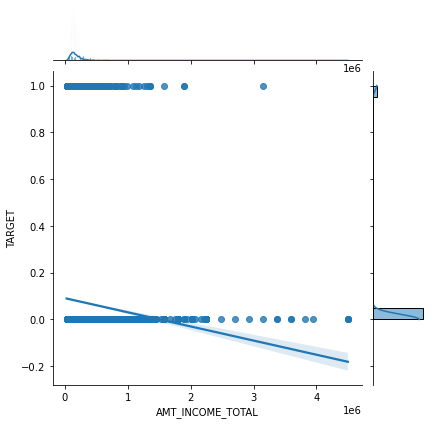

In [93]:
# Regplot of AMT_INCOME_TOTAL vs TARGET
sns.jointplot(app_data['AMT_INCOME_TOTAL'], app_data['TARGET'], kind="reg")
plt.plot()

[]

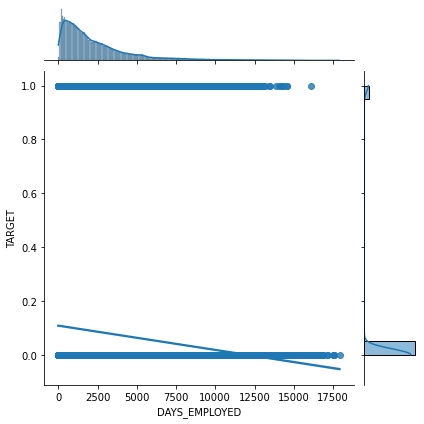

In [94]:
#Regplot of DAYS_EMPLOYED vs TARGET
app_data1 = app_data[app_data["DAYS_EMPLOYED"] < 0]
app_data1["DAYS_EMPLOYED"] = app_data1["DAYS_EMPLOYED"] * -1
sns.jointplot(app_data1["DAYS_EMPLOYED"], app_data["TARGET"], kind="reg")
plt.plot()

[]

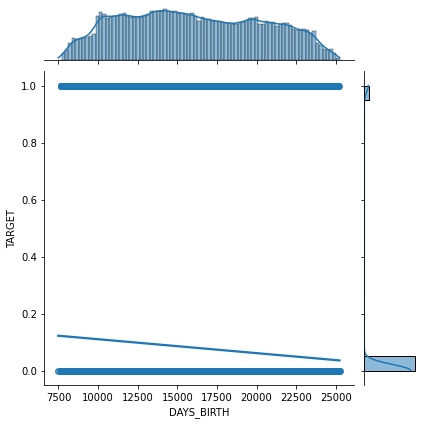

In [95]:
#Regplot of DAYS_BIRTH vs TARGET
sns.jointplot(app_data["DAYS_BIRTH"] * -1, app_data["TARGET"], kind="reg")
plt.plot()

[]

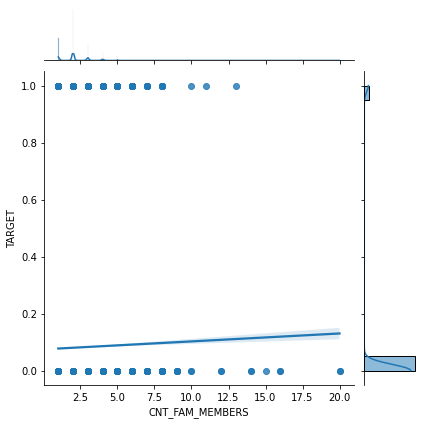

In [96]:
#Regplot of CNT_FAMILY_MEMBERS vs TARGET
sns.jointplot(app_data["CNT_FAM_MEMBERS"] , app_data["TARGET"], kind="reg")
plt.plot()

[]

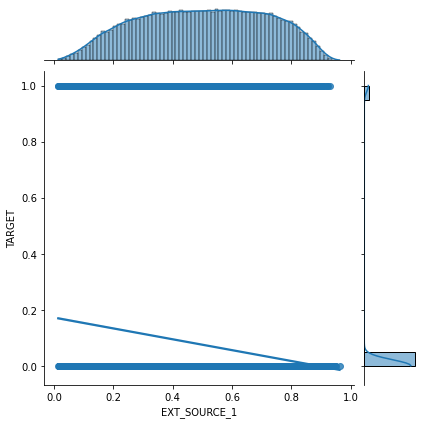

In [97]:
#Regplot of EXT_SOURCE_1 vs TARGET
sns.jointplot(app_data["EXT_SOURCE_1"], app_data["TARGET"], kind="reg")
plt.plot()

[]

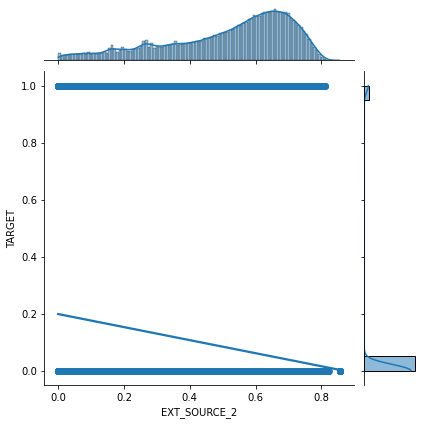

In [98]:
#Regplot of EXT_SOURCE_2 vs TARGET
sns.jointplot(app_data["EXT_SOURCE_2"], app_data["TARGET"], kind="reg")
plt.plot()

[]

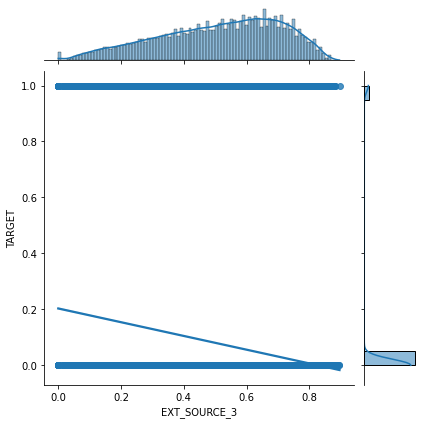

In [99]:
#Regplot of EXT_SOURCE_3 vs TARGET
sns.jointplot(app_data["EXT_SOURCE_3"], app_data["TARGET"], kind="reg")
plt.plot()

In [100]:
#Comparison of EXT_SOURCE_1 vs EXT_SOURCE_2 vs EXT_SOURCE_3
app_data_fail = app_data[app_data["TARGET"] == 1]
app_data_pass = app_data[app_data["TARGET"] == 0]
print("EXT_SOURCE_1 - Difference between Median non-defaulter and Median defaulter: ", app_data_pass['EXT_SOURCE_1'].median() - app_data_fail['EXT_SOURCE_1'].median())
print("EXT_SOURCE_2 - Difference between Median non-defaulter and Median defaulter: ", app_data_pass['EXT_SOURCE_2'].median() - app_data_fail['EXT_SOURCE_2'].median())
print("EXT_SOURCE_3 - Difference between Median non-defaulter and Median defaulter: ", app_data_pass['EXT_SOURCE_3'].median() - app_data_fail['EXT_SOURCE_3'].median())

EXT_SOURCE_1 - Difference between Median non-defaulter and Median defaulter:  0.1558771422942723
EXT_SOURCE_2 - Difference between Median non-defaulter and Median defaulter:  0.13351327813416014
EXT_SOURCE_3 - Difference between Median non-defaulter and Median defaulter:  0.16692271160514643


[]

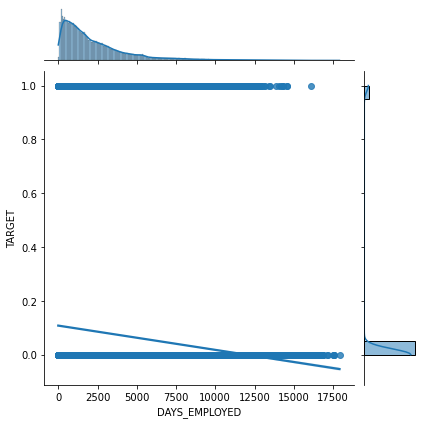

In [101]:
#Regplot of DAYS_EMPLOYED vs TARGET
app_data1 = app_data[app_data["DAYS_EMPLOYED"] < 0]
app_data1["DAYS_EMPLOYED"] = app_data1["DAYS_EMPLOYED"] * -1
sns.jointplot(app_data1["DAYS_EMPLOYED"], app_data["TARGET"], kind="reg")
plt.plot()

**Bivariate Analysis application data

In [102]:
#Bucketing Continuous columns by quantiles group
app_data1["INCOME_GROUP"] = pd.cut(app_data1["AMT_INCOME_TOTAL"], [0.0, 1.125000e+05, 1.470735e+05, 2.025000e+05, 4.500000e+06], labels=['Q1' , 'Q2', 'Q3' , 'Q4'])
app_data1["EMPLOYMENT_EXPERIENCE"] = pd.cut(app_data1["DAYS_EMPLOYED"], [0.0, 767, 1648, 3175, 17912], labels=['VL' , 'L', 'M' , 'H'])
app_data1["EXTSOURCE3_GROUP"] = pd.cut(app_data1["EXT_SOURCE_3"], [0.0, 0.35, 0.50, 0.65,1.0], labels=['VL', 'L', 'M', 'H'])
app_data1['AGE_GROUP'] = pd.cut(app_data['DAYS_BIRTH']*-1, [7489, 12413, 15750, 19682, 25229], labels=['VL', 'L', 'M', 'H'])
app_data1['CNT_FAM_MEMBERS'] = pd.cut(app_data['CNT_FAM_MEMBERS'], [1.0,2.0,3.0,4.0, 20.1], labels=['1', '2', '3', '4 & more'])
app_data1['CNT_CHILDREN'] = pd.cut(app_data['CNT_CHILDREN'], [0.0,1.0,2.0,3.0, 20.1], labels=['0', '1', '2', '3 & more'])

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='AGE_GROUP'>

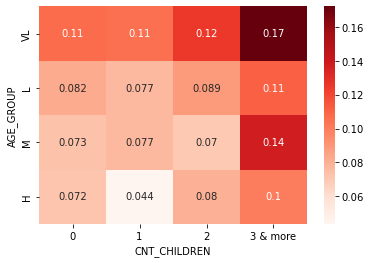

In [103]:
#Bivariate analysis of AGE_GROUP and CNT_CHILDREN
pt= pd.pivot_table(data=app_data1, index="AGE_GROUP", columns= "CNT_CHILDREN", values = "TARGET", aggfunc = np.mean)
sns.heatmap(pt, cmap="Reds", annot=True)

<AxesSubplot:xlabel='EMPLOYMENT_EXPERIENCE', ylabel='NAME_EDUCATION_TYPE'>

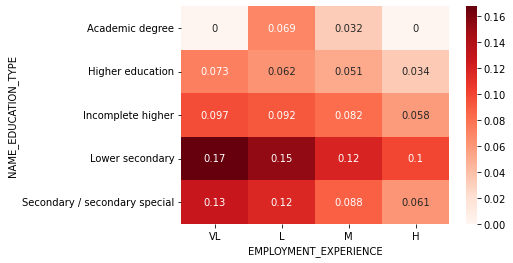

In [104]:
#Bivariate analysis of NAME_EDUCATION_TYPE and EMPLOYMENT_EXPERIENCE
pt= pd.pivot_table(data=app_data1, index="NAME_EDUCATION_TYPE", columns= "EMPLOYMENT_EXPERIENCE", values = "TARGET", aggfunc = np.mean)
sns.heatmap(pt, cmap="Reds", annot=True)

<AxesSubplot:xlabel='EXTSOURCE3_GROUP', ylabel='REGION_RATING_CLIENT'>

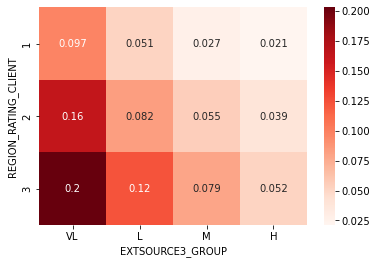

In [105]:
#Bivariate analysis of REGION_RATING_CLIENT and EXTSOURCE3_GROUP
pt= pd.pivot_table(data=app_data1, index="REGION_RATING_CLIENT", columns= "EXTSOURCE3_GROUP", values = "TARGET", aggfunc = np.mean)
sns.heatmap(pt, cmap="Reds", annot=True)

**Univariate Analysis previous application data**

In [106]:
# Filtering prev_data further by removing values with 'AMT_CREDIT' = 0.0
prev_data = prev_data[prev_data['AMT_CREDIT'] > 0.0]

In [107]:
#Role of NAME_SELLER_INDUSTRY
df = prev_data.groupby(by="NAME_SELLER_INDUSTRY").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_SELLER_INDUSTRY
MLM partners            0.043902
Tourism                 0.044643
Clothing                0.053968
Furniture               0.057763
Construction            0.063122
Industry                0.068123
Consumer electronics    0.072006
XNA                     0.079459
Jewelry                 0.083721
Connectivity            0.086507
Auto technology         0.096284
Name: TARGET, dtype: float64

In [108]:
#Role of NAME_PORTFOLIO
df = prev_data.groupby(by="NAME_PORTFOLIO").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_PORTFOLIO
Cars     0.031250
POS      0.073857
Cash     0.076820
Cards    0.089966
Name: TARGET, dtype: float64

In [109]:
#Role of NAME_CASH_LOAN_PURPOSE
df = prev_data.groupby(by="NAME_CASH_LOAN_PURPOSE").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_CASH_LOAN_PURPOSE
Money for a third person            0.000000
Buying a holiday home / land        0.064103
XNA                                 0.073116
XAP                                 0.075963
Everyday expenses                   0.078469
Furniture                           0.078853
Buying a new car                    0.088889
Journey                             0.090517
Business development                0.092784
Education                           0.094637
Purchase of electronic equipment    0.097656
Other                               0.106876
Buying a garage                     0.111111
Buying a used car                   0.111987
Repairs                             0.116137
Medicine                            0.125428
Wedding / gift / holiday            0.126154
Building a house or an annex        0.133874
Urgent needs                        0.134672
Gasification / water supply         0.139785
Payments on other loans             0.142857
Buying a home                   

In [110]:
#Role of NAME_CLIENT_TYPE
df = prev_data.groupby(by="NAME_CLIENT_TYPE").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_CLIENT_TYPE
Refreshed    0.065413
Repeater     0.072436
XNA          0.074341
New          0.088180
Name: TARGET, dtype: float64

In [111]:
#Role of CHANNEL_TYPE
df = prev_data.groupby(by="CHANNEL_TYPE").mean()
df.sort_values(by='TARGET')['TARGET']

CHANNEL_TYPE
Car dealer                    0.027027
Channel of corporate sales    0.049221
Stone                         0.070347
Regional / Local              0.072494
Credit and cash offices       0.076377
Country-wide                  0.077328
Contact center                0.085024
AP+ (Cash loan)               0.104376
Name: TARGET, dtype: float64

In [112]:
#Role of NAME_GOODS_CATEGORY
df = prev_data.groupby(by="NAME_GOODS_CATEGORY").mean()
df.sort_values(by='TARGET')['TARGET']

NAME_GOODS_CATEGORY
Animals                     0.000000
Additional Service          0.041237
Tourism                     0.041667
Fitness                     0.042683
Education                   0.053333
Medical Supplies            0.053458
Clothing and Accessories    0.053990
Furniture                   0.055957
Other                       0.057502
Homewares                   0.061687
Medicine                    0.062500
Gardening                   0.062996
Construction Materials      0.066315
Weapon                      0.067797
Consumer Electronics        0.068269
Sport and Leisure           0.068369
Direct Sales                0.068592
Photo / Cinema Equipment    0.072019
Audio/Video                 0.074264
Computers                   0.076197
XNA                         0.080119
Office Appliances           0.083991
Mobile                      0.084212
Jewelry                     0.084435
Auto Accessories            0.087459
Vehicles                    0.092454
Insurance         

**Bivariate Analysis previous application data**

In [113]:
#Role of ratios of continuous variables in predicting default rate
prev_data["ANNUITY_TO_CREDIT_RATIO"] = prev_data["AMT_ANNUITY"]/prev_data["AMT_CREDIT"]
prev_data["DOWNPAYMENT_TO_CREDIT_RATIO"] = prev_data["AMT_DOWN_PAYMENT"]/prev_data["AMT_CREDIT"]
prev_data["INCOME_TO_CREDIT_RATIO"] = prev_data["AMT_INCOME_TOTAL"]/prev_data["AMT_CREDIT"]
prev_data["APPLICATION_TO_CREDIT_RATIO"] = prev_data["AMT_APPLICATION"]/prev_data["AMT_CREDIT"]

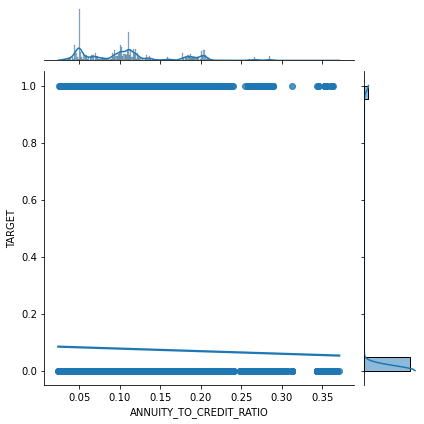

In [114]:
sns.jointplot(prev_data["ANNUITY_TO_CREDIT_RATIO"], prev_data["TARGET"], kind="reg")

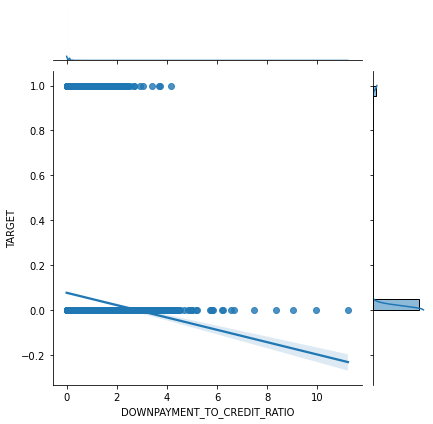

In [115]:
sns.jointplot(prev_data["DOWNPAYMENT_TO_CREDIT_RATIO"], prev_data["TARGET"], kind="reg")

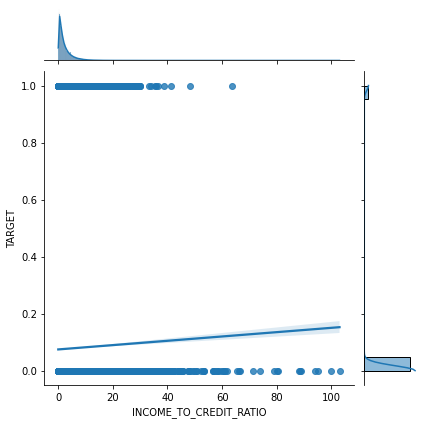

In [116]:
sns.jointplot(prev_data["INCOME_TO_CREDIT_RATIO"], prev_data["TARGET"], kind="reg")

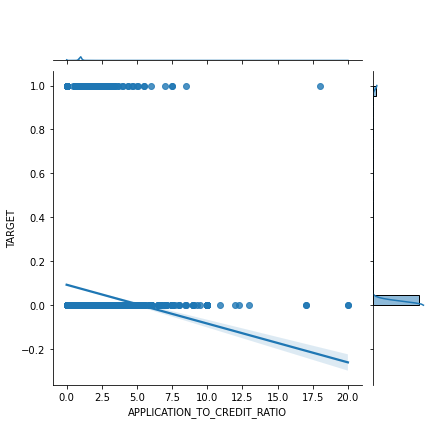

In [117]:
sns.jointplot(prev_data["APPLICATION_TO_CREDIT_RATIO"], prev_data["TARGET"], kind="reg")

In [118]:
#Creating buckets for continuous variables for plotting heatmap
prev_data["CREDIT_GROUP"] = pd.cut(prev_data["AMT_CREDIT"], [0.0, 47061, 98068, 203760, 10000000], labels=['VL' , 'L', 'M' , 'H'])
prev_data["DOWNPAYMENT_GROUP"] = pd.cut(prev_data["AMT_DOWN_PAYMENT"], [0.0, 1.0, 2250, 300000], labels=['L', 'M', 'H'])
prev_data["INCOME_GROUP"] = pd.cut(prev_data["AMT_INCOME_TOTAL"], [0.0, 1.125000e+05, 1.470735e+05, 2.025000e+05, 4.500000e+06], labels=['VL' , 'L', 'M' , 'H'])

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='CREDIT_GROUP'>

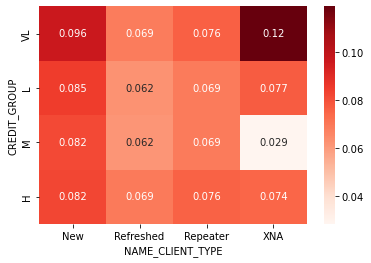

In [121]:
# Heatmap between CREDIT_GROUP and NAME_CLIENT_TYPE
pt= pd.pivot_table(data=prev_data, index="CREDIT_GROUP", columns= "NAME_CLIENT_TYPE", values = "TARGET", aggfunc = np.mean)
sns.heatmap(pt, cmap="Reds", annot=True)

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='INCOME_GROUP'>

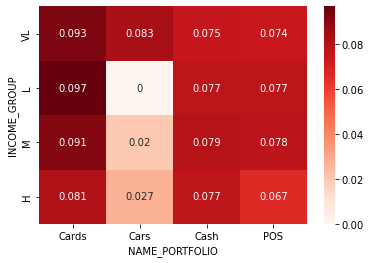

In [120]:
# Heatmap between INCOME_GROUP and NAME_PORTFOLIO
pt= pd.pivot_table(data=prev_data, index="INCOME_GROUP", columns= "NAME_PORTFOLIO", values = "TARGET", aggfunc = np.mean)
sns.heatmap(pt, cmap="Reds", annot=True)